## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

add version to each of the installs - capture the environment

In [241]:
!pip freeze

aiobotocore==2.1.2
aiohttp==3.8.1
aioitertools==0.10.0
aiosignal==1.2.0
async-timeout==4.0.2
asynctest==0.13.0
attrs==21.4.0
awscli==1.22.23
backcall==0.2.0
boto3==1.22.2
botocore==1.23.24
charset-normalizer==2.0.12
colorama==0.4.3
cycler==0.11.0
decorator==5.1.1
docutils==0.15.2
entrypoints==0.4
frozenlist==1.2.0
fsspec==2022.1.0
idna==3.3
idna-ssl==1.1.0
ipykernel==5.5.6
ipython==7.16.3
ipython-genutils==0.2.0
jedi==0.17.2
jmespath==0.10.0
joblib==1.1.0
jupyter-client==7.1.2
jupyter-core==4.9.2
kiwisolver==1.3.1
matplotlib==3.3.4
multidict==5.2.0
nest-asyncio==1.5.4
numpy==1.19.5
pandas==1.1.5
parso==0.7.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==8.4.0
prompt-toolkit==3.0.28
ptyprocess==0.7.0
pyasn1==0.4.8
Pygments==2.11.2
pyparsing==3.0.8
python-dateutil==2.8.2
pytz==2022.1
PyYAML==5.4.1
pyzmq==19.0.0
rsa==4.7.2
s3fs==2022.1.0
s3transfer==0.5.0
scikit-learn==0.24.2
scipy==1.5.4
seaborn==0.11.2
six==1.16.0
sklearn==0.0
threadpoolctl==3.1.0
tornado==6.0.4
traitlets==4.3.3
typing-exte

In [239]:
!pip install --index-url https://repo.dtcc.com/repository/dtcc-pypi-public/simple --trusted-host repo.dtcc.com pandas;
!pip install --index-url https://repo.dtcc.com/repository/dtcc-pypi-public/simple --trusted-host repo.dtcc.com seaborn;  
!pip install --index-url https://repo.dtcc.com/repository/dtcc-pypi-public/simple --trusted-host repo.dtcc.com scipy;
!pip install --index-url https://repo.dtcc.com/repository/dtcc-pypi-public/simple --trusted-host repo.dtcc.com matplotlib;   
!pip install --index-url https://repo.dtcc.com/repository/dtcc-pypi-public/simple --trusted-host repo.dtcc.com boto3;
!pip install --index-url https://repo.dtcc.com/repository/dtcc-pypi-public/simple --trusted-host repo.dtcc.com wrapt==1.11.0;
!pip install --index-url https://repo.dtcc.com/repository/dtcc-pypi-public/simple --trusted-host repo.dtcc.com s3fs sklearn;

Looking in indexes: https://repo.dtcc.com/repository/dtcc-pypi-public/simple
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://repo.dtcc.com/repository/dtcc-pypi-public/simple
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://repo.dtcc.com/repository/dtcc-pypi-public/simple
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://repo.dtcc.com/repository/dtcc-pypi-public/simple
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://repo.dtcc.com/repository/dtcc-pypi-public/simple
     |████████████████████████████████| 8.7 MB 46.9 MB/s eta 0:00:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.23.24
    Uninstalling botocore-1.23.24:
      Successfully uninstall

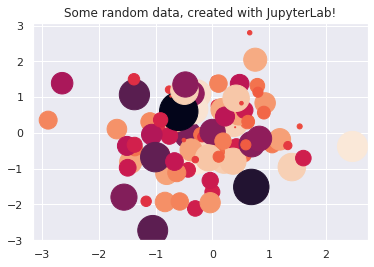

In [267]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

![](https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000)

## **House Prices: Exploratory Data Analysis to Machine Learning**  

**Data description**  
This is a  description of the 79 features here: [**Ames Housing Dataset Details**](https://www.kaggle.com/datasets/marcopale/housing)

A more detailed data dictionary can be found here: [**AmStat Data Dictionary**](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

  
**This notebook includes the following approaches and techniques:**

CHANGE THIS

Session 1
* EDA (exploratory data analysis) with Pandas and Seaborn
* Find features with strong correlation to target
* apply basic Regression models of sklearn

Session 2
* Data Wrangling, convert categorical to numerical
* use gridsearchCV to find the best parameters for each model
* compare the performance of the Regressors and choose best one



# Part 0 : Imports, Settings, Functions

In [268]:
import numpy as np #for advanced math
import pandas as pd #for data manipulation
pd.set_option('max_columns', 105) #this makes everything nicer to read
import matplotlib.pyplot as plt #for plotting!
import seaborn as sns #for pretty and easy to use plotting! works with plt
from scipy import stats #for stats things
import boto3 #to handle files in s3
import s3fs #to import those files into a pandas dataframe
from sklearn.linear_model import LinearRegression #to draw our line of best fit!
%matplotlib inline
sns.set() 

import warnings 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

full_dataset =  pd.read_csv('s3://sag-dev-risk-sagemaker-yolo/sharing/madlabdata/AmesHousing.csv')
target = pd.read_csv('s3://sag-dev-risk-sagemaker-yolo/sharing/madlabdata/target.csv') #sales price - what we're trying to predict
train = pd.read_csv('s3://sag-dev-risk-sagemaker-yolo/sharing/madlabdata/train.csv') #what we use to create the model - called 'training'
#test =  pd.read_csv('s3://sag-dev-risk-sagemaker-yolo/sharing/madlabdata/test.csv') #what we use to check our created model - 'testing'
test_big = pd.concat([full_dataset,train]).drop_duplicates(keep=False)
test = test_big[0:500]

In [269]:
full_dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Part 1: Exploratory Data Analysis

## 1.1 Overview of features and relation to target

First things first, we need to get a good look at the data to see what we're working with.

Let's get a first overview of the data


    - What are the names of the features (columns)?  
    - Which features are numerical, which are categorical?  
    - What does our target (outcome) variable look like? 

The **shape** and **info** methods answer these questions  

**head** displays some rows of the dataset  
**describe** gives a summary of the statistics (only for numerical columns)

In [270]:
full_dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [271]:
print(train.shape)
print("*"*50)
print(test.shape)

(2197, 82)
**************************************************
(500, 82)


df train has 82 columns (79 features + id and target SalePrice) and 2197 entries (number of rows or house sales)  

df test has 81 columns (79 features + id) and 733 entries  



In [272]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 3 to 2010
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            500 non-null    int64  
 1   PID              500 non-null    int64  
 2   MS SubClass      500 non-null    int64  
 3   MS Zoning        500 non-null    object 
 4   Lot Frontage     410 non-null    float64
 5   Lot Area         500 non-null    int64  
 6   Street           500 non-null    object 
 7   Alley            40 non-null     object 
 8   Lot Shape        500 non-null    object 
 9   Land Contour     500 non-null    object 
 10  Utilities        500 non-null    object 
 11  Lot Config       500 non-null    object 
 12  Land Slope       500 non-null    object 
 13  Neighborhood     500 non-null    object 
 14  Condition 1      500 non-null    object 
 15  Condition 2      500 non-null    object 
 16  Bldg Type        500 non-null    object 
 17  House Style    

Some observations:

1) There is lots of info that is probably related to the SalePrice like the area, the neighborhood, the condition and quality.   


2) Maybe other features are not so important for predicting the target


3) There might be a strong correlation for some of the features (like GarageCars and GarageArea)


4) For some columns many values are missing: only 1 values for Pool QC in the training set, and 55 for Alley

In [ ]:
test.describe()

Describe will only be helpful for numerical values and it just gives you a better picture of  the data you're looking at. Some cool things to note here:
    
   Year Built - minimum is 1880!! and max is 2010.  Average year built is ~1970
   
   1st floor square footage - average is 1123SF,  minimum is 483SF (a bit bigger than a 2 car garage), max is 3820SF (larger than a tennis court)

### 1.2 The target variable : Distribution of SalePrice

We're going to try and predict the price of a house given other variables.


In [243]:
train['SalePrice'].describe()

count      2197.000000
mean     182376.851161
std       81168.157405
min       13100.000000
25%      130000.000000
50%      163500.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

[Text(0.5, 1.0, 'Sales Price of Houses in Ames IA')]

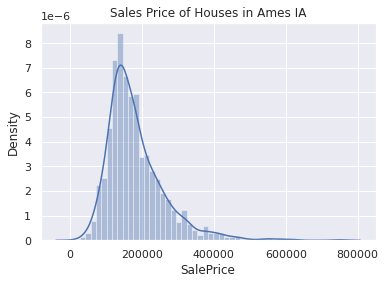

In [244]:
sns.distplot(train['SalePrice']).set(title='Sales Price of Houses in Ames IA')#,ax = axs[0][0])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[Text(0.5, 1.0, 'Sales Price after Log Transform')]

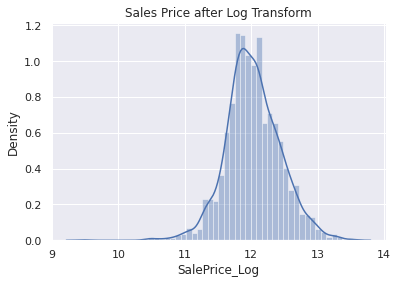

In [273]:
#stats note: the target variable SalePrice is not normally distributed.  
#This can reduce the performance of the ML regression models because some assume normal distribution, 
#so we do a log transform, and it looks much better
train['SalePrice_Log'] = np.log(train['SalePrice'])
test['SalePrice_Log'] = np.log(test['SalePrice'])
sns.distplot(train['SalePrice_Log']).set(title="Sales Price after Log Transform")


### 1.3 Numerical and Categorical features

numerical features are things such as '1st Floor Square Feet', where we are capturing a measurement.

categorical features are things such as 'House Style', where we are putting things into categories such as 'Split Level' or 'One Story'.

Eventually, all features must be numerical in some form so that the computer can use them. Usually this is done by recoding the categories into numbers, so 'Split Level' becomes 1, 'One Story' becomes 2, and so on. 



In [274]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  40
Number of Categorical features:  43


In [275]:
print("NUMERICAL FEATURES")
print(train[numerical_feats].columns)
print("*"*100)
print("CATEGORICAL FEATURES")
print(train[categorical_feats].columns)

NUMERICAL FEATURES
Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'SalePrice_Log'],
      dtype='object')
****************************************************************************************************
CATEGORICAL FEATURES
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 

## 1.4 List of Features with Missing Values

In [276]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5) #only showing top 5

,Total,Percent
Pool QC,2185,0.994538
Misc Feature,2117,0.963587
Alley,2054,0.934911
Fence,1778,0.809285
Fireplace Qu,1066,0.485207


**Filling missing values**  
For a few columns there is lots of NaN entries.  
However, reading the data description we find this is not missing data:  
For PoolQC, NaN is not missing data but means no pool, likewise for Fence, FireplaceQu etc.  

In [277]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['Pool QC','Misc Feature','Alley','Fence','Mas Vnr Type','Fireplace Qu',
               'Garage Qual','Garage Cond','Garage Finish','Garage Type', 'Electrical',
               'Kitchen Qual', 'Sale Type', 'Functional', 'Exterior 2nd', 'Exterior 1st',
               'Bsmt Exposure','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2',
               'MS Zoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    train[col].fillna('None',inplace=True)
    test[col].fillna('None',inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [278]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Lot Frontage,362,0.164770
Garage Yr Blt,122,0.055530
Mas Vnr Area,22,0.010014
Garage Area,1,0.000455
Total Bsmt SF,1,0.000455


In [279]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [280]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("missing values in train data: ",train.isnull().sum().sum() )
print("missing values in test data: ", test.isnull().sum().sum())

missing values in train data:  0
missing values in test data:  0


### 1.5 Log Transform on Other Variables

Like the target variable, also some of the feature values are not normally distributed (aka in a bell curve) and it is therefore better to use their log values. For brevity, those checks were excluded from this notebook, but here is the transformation:

In [281]:
for df in [train, test]:
    df['GrLivArea_Log'] = np.log(df['Gr Liv Area'])
    df.drop('Gr Liv Area', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['Lot Area'])
    df.drop('Lot Area', inplace= True, axis = 1)
    
numerical_feats = train.dtypes[train.dtypes != "object"].index

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

## 1.6 Relation of features to target (SalePrice_log)

### Plots of relation to target for all numerical features


Let's look for variables that have a strong relationship to our outcome - SalePrice_Log

We will use these later in creating our own model, so remember the ones you think are strongest!


Here is an example of correlation, which is one of the ways we measure the strength of the relationship between the target/outcome (Y) and the feature (X):


![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/strong-positive-and-negative-correlation.png)

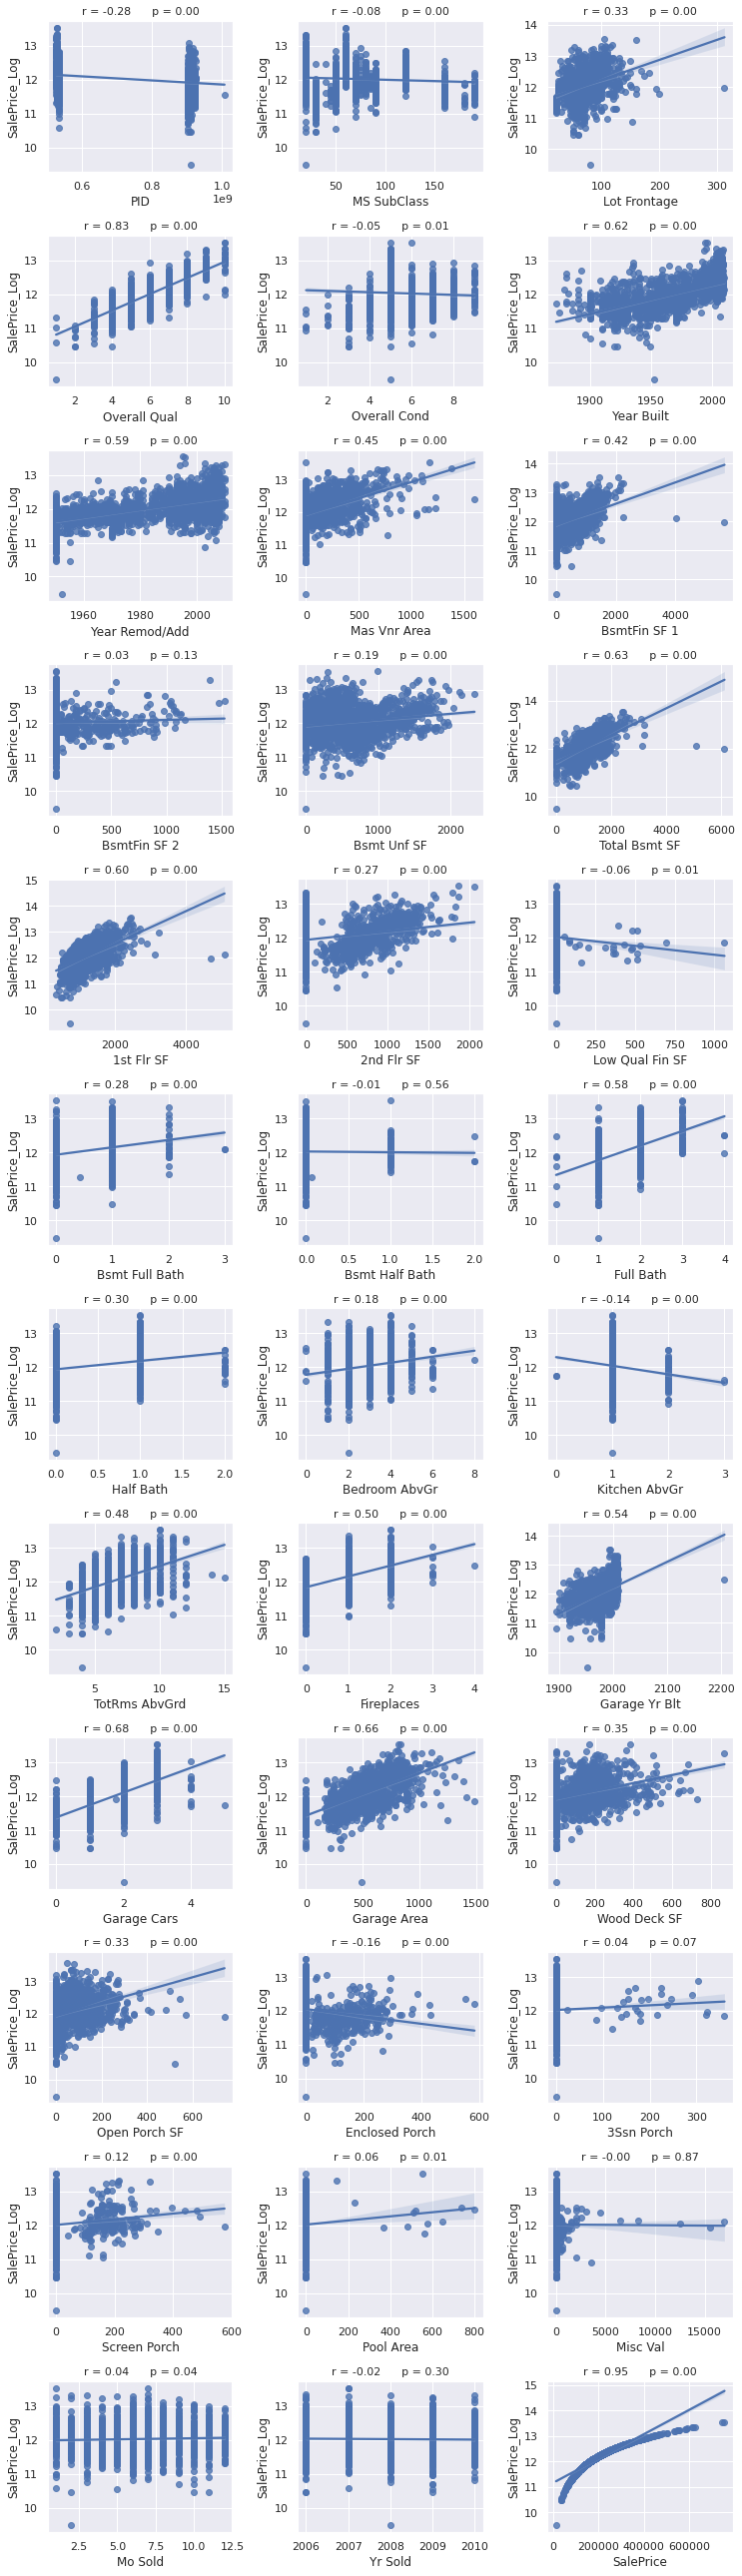

In [254]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Order','PID' 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(li_plot_num_feats):
            sns.regplot(train[li_plot_num_feats[i]], train['SalePrice_Log'], ax = axs[r][c])
            stp = stats.pearsonr(train[li_plot_num_feats[i]],train['SalePrice_Log'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

**Conclusion from EDA on numerical columns:**

We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.  
For other features like 'MSSubClass' the correlation is very weak.  

We also see that the entries for some of the numerical columns are in fact categorical values.  
For example, the numbers for 'OverallQual' and 'MSSubClass' represent a certain group for that feature ( see data description txt)

## 1.7 Relation to SalePrice for all categorical features

Same deal for categorical, but these we will be modeling in the next session. 

For reading box plots - The line through the middle is the mean, and the ends show the range. The box is drawn where 75% of the data lies.  All points outside are considered outliers



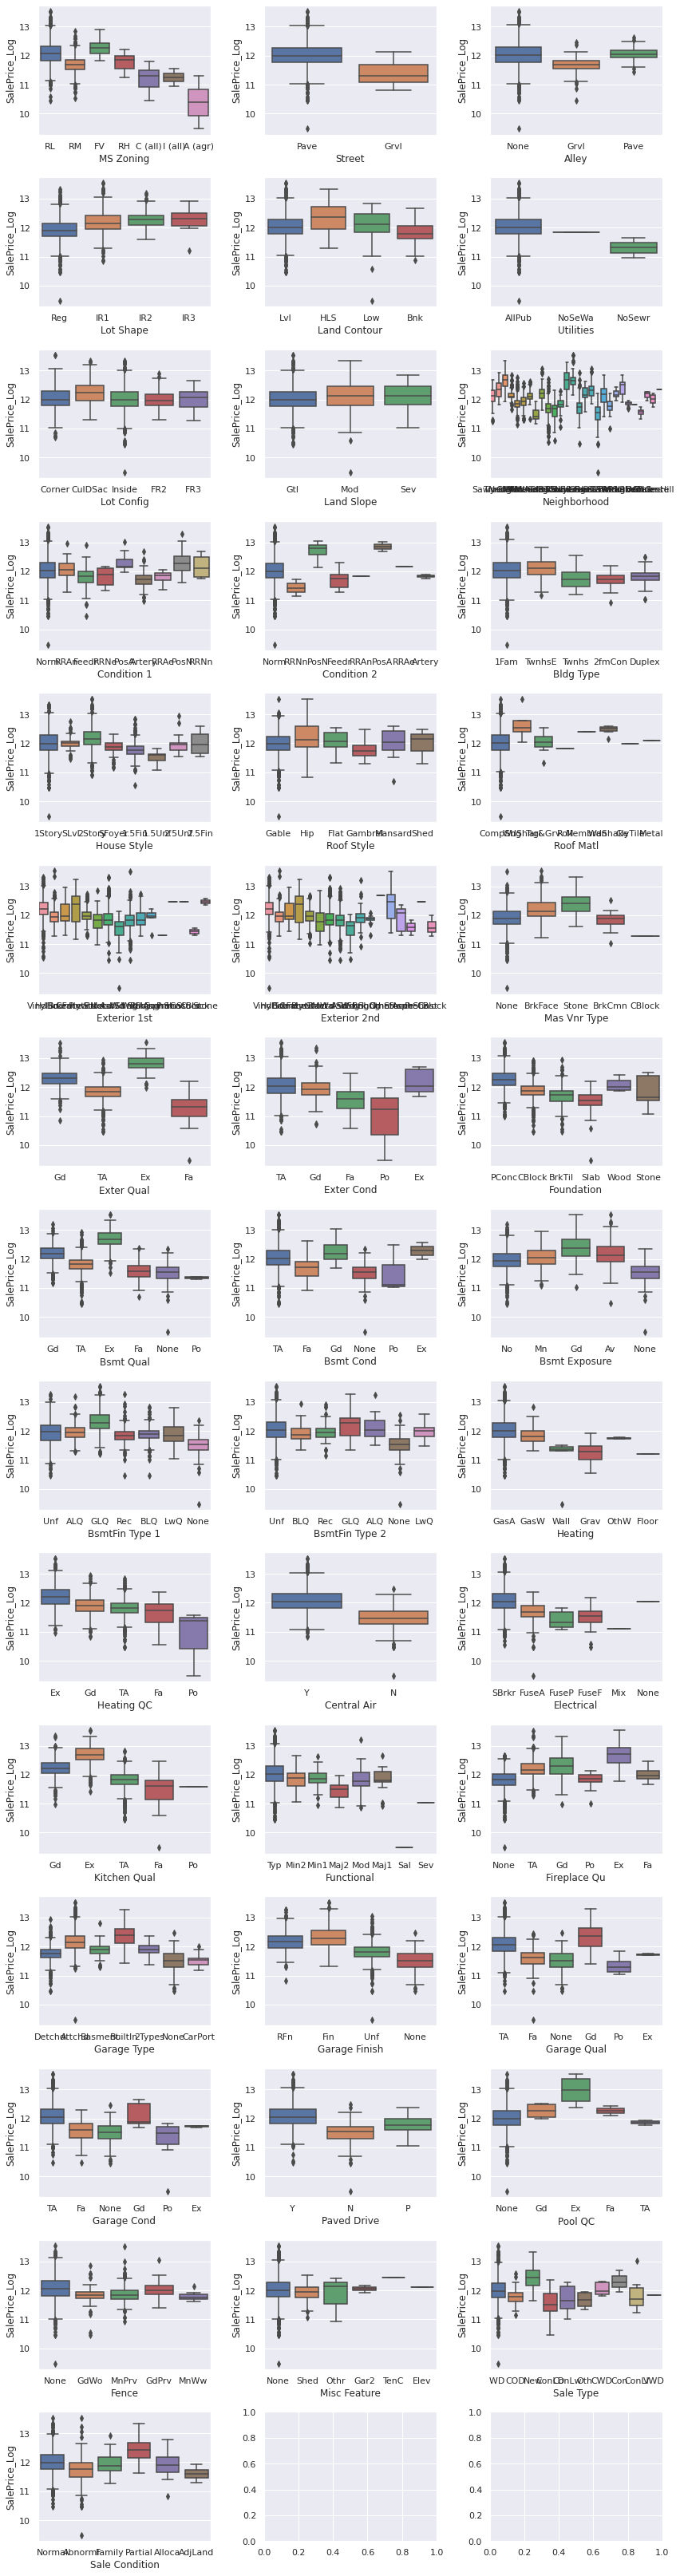

In [255]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=train['SalePrice_Log'], data=train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

**Conclusion from EDA on categorical columns:**

For many of the categorical there is no strong relation to the target.  
However, for some features it is easy to find a strong relation.  


From the figures above these are : 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'

 

## Part 2. Modelling

With the information we have now, we can begin to create a model of our data to predict the sales price of houses in our test set using numerical features. Categorical features will be dealt with in the second session.

First, we partition our training set into "features" (columns with info) and our "target" (the outcome/thing we'll try and predict)

The linear regression will be drawing a line where:

    Y = mX + b
    
    Y = target = SalePrice_Log
    X = our set of features (there are many of these, so instead of a two dimensional line it will be a n dimensional line where n is the number of features)

m and b will be calculated by the computer

In [256]:
li_num_feats.remove('SalePrice_Log')
li_num_feats.remove('SalePrice')
target = train['SalePrice_Log']
target_test = test['SalePrice_Log']
num_features = train[li_num_feats]

In [257]:
test.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', '

In [258]:
print("The features we can use in the model are: " ,li_num_feats)

The features we can use in the model are:  ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'GrLivArea_Log', 'LotArea_Log']


## 2.1 Create First Model

Now we can use what we learned above, and create a model. Here are some features that I thought may predict sales price of a home:
    
    Fireplaces
    Year Built
    Overall Quality
    
I can use this model to predict the price of a theoretical house

The model will be evaluated using an R-squared value.

R-squared is always between 0 and 100%:

0% represents a model that does not explain any of the variation in the response variable (Y- saleprice_log) around its mean. The mean of the dependent variable (X - our features) predicts the dependent variable as well as the regression model.

![](https://www.myaccountingcourse.com/financial-ratios/images/r-squared.jpg)

100% represents a model that explains all the variation in the response variable around its mean. This is can be too much! This can mean the model is 'overfit', which means that the model has 'connected the dots' instead of drawing a meaningful trend line. We don't want that either

<div> <img src="https://miro.medium.com/max/1400/1*6vPGzBNppqMHllg1o_se8Q.png" alt="Drawing" style="width: 800px;"/></div> 


In [282]:
some_features = train[['Fireplaces','Year Built','Overall Qual']]


In [283]:
reg = LinearRegression().fit(some_features, target)

ValueError: Found input variables with inconsistent numbers of samples: [2197, 733]

In [261]:
print("The score or R^2 of my model is: " ,reg.score(some_features,target)*100)

The score or R^2 of my model is:  75.16737120923167


In [262]:
some_features_test = test[['Fireplaces','Year Built','Overall Qual']]

In [263]:
predictions_test = reg.predict(some_features_test)
preds_test = pd.DataFrame({'Actual': target_test, 'Predicted': predictions_test})
preds_test.head()

,Actual,Predicted
3,12.404924,12.365910
4,12.154253,11.954764
6,12.271392,12.361892
10,12.077671,12.121210
13,12.052339,12.290447


The predictions look very close to the actual value!

For fun let's try using our model on an imaginary house

In [264]:
imaginary_house = pd.DataFrame({'Fireplaces': [50],'Year Built':[2000],'Overall Qual': 1})

print("According to my model, the sales prices of my imaginary house is $",
      format(int(np.exp(reg.predict(imaginary_house))),',d'))

According to my model, the sales prices of my imaginary house is $ 63,040,539


## 2.2 Customize your Model!

Now it's your turn - take a few of the variables from the below list, and use them to create your own model!

See if you can beat the one I made using the information we learned from our Data Exploration.

[ 'MS SubClass', 'Lot Frontage', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'GrLivArea_Log', 'LotArea_Log']

In [265]:
my_feats = ['your features','listed','here'] #change this line
my_features = train[my_feats]
my_features_test = test[my_feats]

my_reg = LinearRegression().fit(my_features, target)
print("The score or R^2 of my model is: " ,my_reg.score(my_features,target)*100)

KeyError: "None of [Index(['your features', 'listed', 'here'], dtype='object')] are in the [columns]"

In [ ]:
imaginary_house = pd.DataFrame({'Your features': [0],'listed':[0],'here': 0})#change this line

print("According to my model, the sales prices of my imaginary house is $",
      format(int(np.exp(my_reg.predict(imaginary_house))),',d'))

In [ ]:
my_predictions_test = my_reg.predict(my_features_test)
my_preds_test = pd.DataFrame({'Actual': target_test, 'Predicted': my_predictions_test})
my_preds_test.head()